In [1]:
from sklearn.datasets.samples_generator import make_regression

In [4]:
X, y = make_regression(n_samples = 1000, 
                      n_features = 1,
                      noise = 10,
                      random_state = 42)
#noise 클수록 더 커짐 

In [5]:
X[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

In [7]:
gd_lr = linear_model.LinearRegresionGD(eta0=0.001, epochs = 10000, batch_size = 1, shuffle=False)
#pure GD

NameError: name 'linear_model' is not defined

In [8]:
bgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = len(X), shuffle = False)
#full batch


NameError: name 'linear_model' is not defined

In [9]:
sgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = len(X), shuffle = True)
#stochastic 


NameError: name 'linear_model' is not defined

In [ ]:
msgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = 100, shuffle = True)



# Linear Regression with Normal Equation

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_boston
boston=load_boston()

In [10]:
boston.keys()
# key value로 들어옴

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.shape

NameError: name 'df' is not defined

In [42]:
X = df.values
y = boston.target

In [40]:
from sklearn.linear_model import LinearRegression
#LinearRegression패키지는 Normal Equation 으로 구현해 놓은 것. 

In [41]:
lr_ne = LinearRegression(fit_intercept=True)


Normal Equation은 함수 안에 파라미터가 별로 없음<br>
noramlize= > 이부분은 우리가 직접 데이터 Standard 혹은 Minmax로 노멀라이즈 했으면<br>
넣을 필요가 없음. <br>
copy_X 는 x 복사 할지 안할지 <br>
n_jobs = CPU 몇개 쓸지

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [46]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lr_ne.intercept_, lr_ne.coef_

(33.3880621893243,
 array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
        -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
         2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
        -5.48489997e-01]))

In [49]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [26]:
y_true

array([ 2.90873546e+01,  3.19912938e+00,  3.09101980e+01, -1.15647602e+01,
       -2.78174616e+01, -3.23701757e+00,  8.19443864e+00,  1.86658220e+01,
        3.56996967e+00, -2.04938545e+01, -2.47550225e+01,  2.35432404e+01,
        1.71925608e+01,  3.56521007e+01, -1.56019101e+01,  1.27922014e+01,
        2.70045043e-01,  1.59035645e+00, -2.53455157e+01,  1.79249236e+01,
        1.81704267e+01, -1.85848453e+01,  3.99485453e+00, -1.92738111e+01,
       -6.98937569e+00,  1.31908868e+00, -4.51688631e+00,  1.99358804e+01,
        2.25201158e+01, -6.58952529e+00,  3.57412553e+01, -1.83286517e-01,
       -9.02154286e+00, -6.60256461e+00, -5.68317167e+00, -2.67308232e+01,
        1.16222322e+01, -1.03846823e+01,  3.39466165e+01, -2.71151661e+01,
       -1.16617230e+01, -4.29633678e-01, -1.79429654e+01,  2.05203914e+01,
       -1.50103404e+01, -2.05508831e+01, -3.27452372e+01,  9.53066801e+00,
       -1.07978084e+01,  1.04974347e-01, -4.53608855e+00, -2.37587251e+01,
        2.03137572e+01, -

In [51]:
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse

4.554903221837861

In [56]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.747143360308932

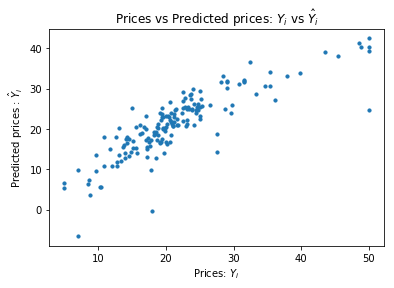

In [58]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#어느정도 Linear 하게 나가지

# Linear Regression with SGD

근데 LinearRegression SGD쓸 필요가 없어. <br>
그냥 Normal Equation 쓰면 돼. 

In [67]:

from sklearn.linear_model import SGDRegressor
#Gradient Descent 기반은 상당히 함수에 파라미터가 많음
lr_SGD = SGDRegressor()
#loss, penalty(l1, l2), alpha-> regulization할 때 lambda
#tolerance -> 이전 loss와 다음 loss가 얼마 이상 차이나면 멈출건지
#eta0는 learning rate그 자체 
#learing rate -> 는 러닝레이트 내릴껀지 그 공식을 말함

In [60]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [61]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state=42)

In [81]:
lr_SGD.fit(X_train, y_train)

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [82]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [83]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse, mse

(4.840872696597067, 23.43404846465897)

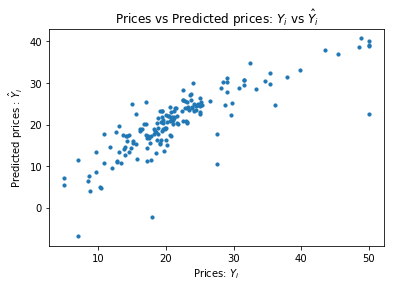

In [85]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#학습이 잘 됬음(Scaled Data 덕분)

# Linear Regression with Ridge & Lasso Regression

In [91]:
from sklearn.linear_model import Lasso, Ridge
#릿지든 랏소든, Normal Equation 이랑도 되고, GD랑도 되지

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [92]:
ridge = Ridge(fit_intercept=True, alpha = 0.5)
#alpha mean lambda value
ridge.fit(X_train, y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
y_hat = ridge.predict(X_test)
y_true = y_test

In [94]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse, mse

(4.581368851153035, 20.988940550315267)

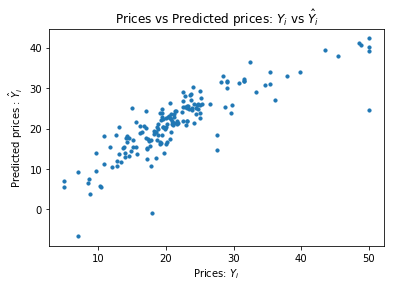

In [95]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#학습이 잘 됬음(Scaled Data 덕분)

### 람다 값 계속 바꿔가면서 릿지 그려 보기

In [118]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
# 20부터 50까지 0.01간격으로
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))
    #여기까지는 해당 alpha넣고 rmse구하고

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        #train이랑 test가 인덱스 return 함
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

51
0
0
0
0
0
0
0
0
0
0.010	 4.5554		 5.8806
51
0
0
0
0
0
0
0
0
0
0.418	 4.5773		 5.8467
51
0
0
0
0
0
0
0
0
0
0.826	 4.5957		 5.8319
51
0
0
0
0
0
0
0
0
0
1.234	 4.6097		 5.8234
51
0
0
0
0
0
0
0
0
0
1.642	 4.6203		 5.8175
51
0
0
0
0
0
0
0
0
0
2.050	 4.6284		 5.8126
51
0
0
0
0
0
0
0
0
0
2.458	 4.6349		 5.8082
51
0
0
0
0
0
0
0
0
0
2.866	 4.6402		 5.8041
51
0
0
0
0
0
0
0
0
0
3.274	 4.6445		 5.8000
51
0
0
0
0
0
0
0
0
0
3.682	 4.6481		 5.7960
51
0
0
0
0
0
0
0
0
0
4.090	 4.6512		 5.7920
51
0
0
0
0
0
0
0
0
0
4.498	 4.6538		 5.7880
51
0
0
0
0
0
0
0
0
0
4.906	 4.6562		 5.7840
51
0
0
0
0
0
0
0
0
0
5.313	 4.6582		 5.7800
51
0
0
0
0
0
0
0
0
0
5.721	 4.6600		 5.7760
51
0
0
0
0
0
0
0
0
0
6.129	 4.6616		 5.7720
51
0
0
0
0
0
0
0
0
0
6.537	 4.6631		 5.7680
51
0
0
0
0
0
0
0
0
0
6.945	 4.6644		 5.7641
51
0
0
0
0
0
0
0
0
0
7.353	 4.6657		 5.7602
51
0
0
0
0
0
0
0
0
0
7.761	 4.6668		 5.7563
51
0
0
0
0
0
0
0
0
0
8.169	 4.6679		 5.7524
51
0
0
0
0
0
0
0
0
0
8.577	 4

In [111]:
kf=KFold(10)
# for train, test in kf.split(X):
#     print(X[train])
#     print(X[test])

X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [96]:
np.linspace(0.01, 20, 50)

array([1.00000000e-02, 4.17959184e-01, 8.25918367e-01, 1.23387755e+00,
       1.64183673e+00, 2.04979592e+00, 2.45775510e+00, 2.86571429e+00,
       3.27367347e+00, 3.68163265e+00, 4.08959184e+00, 4.49755102e+00,
       4.90551020e+00, 5.31346939e+00, 5.72142857e+00, 6.12938776e+00,
       6.53734694e+00, 6.94530612e+00, 7.35326531e+00, 7.76122449e+00,
       8.16918367e+00, 8.57714286e+00, 8.98510204e+00, 9.39306122e+00,
       9.80102041e+00, 1.02089796e+01, 1.06169388e+01, 1.10248980e+01,
       1.14328571e+01, 1.18408163e+01, 1.22487755e+01, 1.26567347e+01,
       1.30646939e+01, 1.34726531e+01, 1.38806122e+01, 1.42885714e+01,
       1.46965306e+01, 1.51044898e+01, 1.55124490e+01, 1.59204082e+01,
       1.63283673e+01, 1.67363265e+01, 1.71442857e+01, 1.75522449e+01,
       1.79602041e+01, 1.83681633e+01, 1.87761224e+01, 1.91840816e+01,
       1.95920408e+01, 2.00000000e+01])

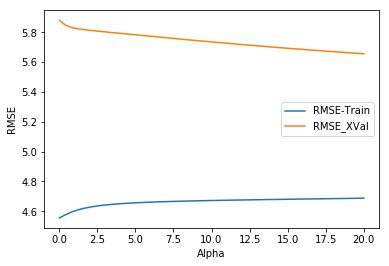

In [99]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()
#람다 늘릴수록 기존 Train 의 RMSE는 늘어나고
# TEST데이터의 RMSE 늘어남. 

In [100]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5549
RMSE on 10-fold CV: 5.8819
Method: lasso
RMSE on training: 4.7270
RMSE on 10-fold CV: 5.7675
Method: ridge
RMSE on training: 4.5710
RMSE on 10-fold CV: 5.8535


### 특별한 경우가 아니면 <br>
SGD보다는 Lasso나 Ridge를 쓰는게 더 좋은 성능을 낸다. 

## Polynomial Regression

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x*np.sin(x**2) + 1
    return (x, y)

In [122]:
def sample(size):
    x = np.linspace(0, 5, size)
    y = x*np.sin(x**2) +1 + np.random.randn(x.size)*0.5
    return (x, y)

In [123]:
f_x, f_y = f(100)

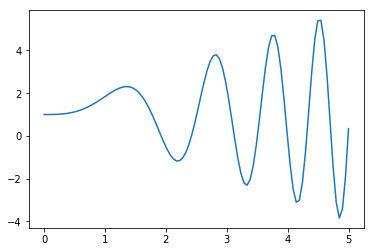

In [124]:
plt.plot(f_x, f_y)

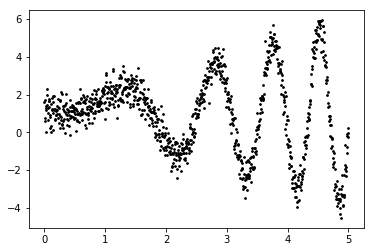

In [126]:
X, y = sample(1000)
plt.scatter(X, y, s =3, c="black")
plt.show()

In [127]:
X.shape, y.shape

((1000,), (1000,))

In [129]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

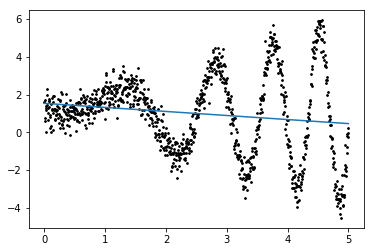

In [140]:
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())

접합이 잘 안되지

### Use Polynomial

In [141]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [143]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

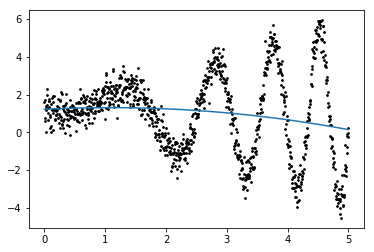

In [145]:
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [149]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=13)
X_poly = poly_features.fit_transform(X)

In [150]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

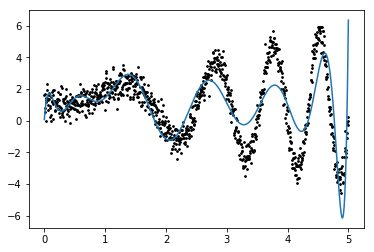

In [151]:
plt.scatter(X.flatten(), y.flatten(), s=3, c='black')
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

## How to optimize?

In [177]:
poly_range = list((range(10, 50)))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

In [178]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [179]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [180]:


for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.005235e-18
  overwrite_a=True).T
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.859594e-19
  overwrite_a=True).T
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.

In [181]:
len(poly_range), len(rmse_lr_list), len(rmse_lasso_list), len(rmse_ridge_list)

(40, 40, 40, 40)

In [182]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lasso_rmse,lr_rmse,ridge_rmse
poly_range,,,
10,2.192131,1.881022,1.908958
11,2.200554,1.873386,1.888186
12,2.205562,1.621200,1.887531
13,2.208125,1.353673,1.863321
14,2.209545,1.337771,1.688016
15,2.210272,0.935370,1.519176
16,2.210530,0.736900,1.484677
17,2.210454,0.703981,1.293005
18,2.210148,0.727113,0.894913


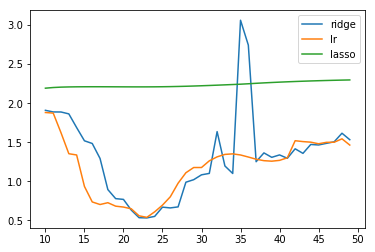

In [183]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [184]:
df.min()

lasso_rmse    2.192131
lr_rmse       0.540041
ridge_rmse    0.532549
dtype: float64

In [185]:
df["ridge_rmse"].sort_values().head()
#degree 22일때가 제일 작네

poly_range
23    0.532549
22    0.535131
24    0.551913
21    0.632613
26    0.660522
Name: ridge_rmse, dtype: float64

In [188]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
#이미 앞에서 들어가 있지
ridge.fit(X_poly,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

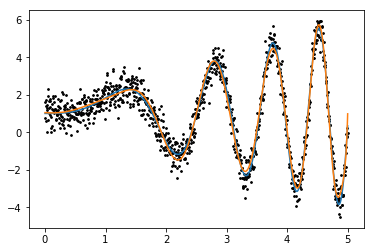

In [189]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

이렇게 optimization을 하는 거야. <br>
결국 실험을 하는 거야. <br>

## Sampling Method

In [190]:
import numpy as np
from sklearn.model_selection import train_test_split

In [197]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#### K-fold Cross Validation

In [206]:
from sklearn import datasets
boston = datasets.load_boston()

In [13]:
X = boston.data
y = boston.target

In [210]:
from sklearn.model_selection import KFold

In [211]:
kf = KFold(n_splits = 10, shuffle = True)

In [213]:
for train_index, test_index in kf.split(X):
    print("TRAIN - ", train_index[:10] )
    print("TRAIN LEN- ", len(train_index) )
    print("TEST - ", test_index[:10] )  
    print("TEST LEN- ", len(test_index) )  

TRAIN -  [ 1  2  3  4  5  6  7  8  9 10]
TRAIN LEN-  455
TEST -  [ 0 11 15 24 26 36 39 41 43 79]
TEST LEN-  51
TRAIN -  [ 0  1  2  3  4  5  6  7  9 10]
TRAIN LEN-  455
TEST -  [ 8 14 23 28 31 60 75 85 87 94]
TEST LEN-  51
TRAIN -  [ 0  1  3  4  5  6  7  8  9 10]
TRAIN LEN-  455
TEST -  [ 2 20 21 22 32 54 59 69 82 90]
TEST LEN-  51
TRAIN -  [ 0  1  2  4  5  6  7  8  9 10]
TRAIN LEN-  455
TEST -  [ 3 27 33 40 44 47 49 73 78 95]
TEST LEN-  51
TRAIN -  [ 0  1  2  3  5  6  7  8  9 10]
TRAIN LEN-  455
TEST -  [  4  12  56  61  65  74 104 108 120 127]
TEST LEN-  51
TRAIN -  [ 0  1  2  3  4  5  6  8 10 11]
TRAIN LEN-  455
TEST -  [ 7  9 17 18 30 62 67 70 72 80]
TEST LEN-  51
TRAIN -  [ 0  2  3  4  5  6  7  8  9 11]
TRAIN LEN-  456
TEST -  [ 1 10 13 38 42 46 52 63 68 83]
TEST LEN-  50
TRAIN -  [ 0  1  2  3  4  5  7  8  9 10]
TRAIN LEN-  456
TEST -  [  6  16  45  50  66  76  91 113 116 117]
TEST LEN-  50
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TRAIN LEN-  456
TEST -  [19 25 35 37 51 53 55 57 64 77]
TEST 

모델별로 real test 

In [214]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [222]:
kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])    
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

In [224]:
sum(lasso_mse)/10, sum(ridge_mse)/10
#거의 똑같네

(34.468098837801115, 34.13523528291733)

Cross Validation Score를 사용하면 더 간단하게 쓸 수 있음. 

In [225]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [233]:
lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

#cv는 kfold 몇번 나눌껀지를 의미함. 
#위에서 길게 쓴걸 한방에 해주는거임
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring="neg_mean_squared_error")
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, scoring="neg_mean_squared_error")
#scoring -> sklearn metrics검색해서 뭐 쓸지 찾으면 되는겨

In [234]:
lasso_scores
ridge_scores
# 여기에는 10번 돈 각각의 점수들이 들어있지

array([  -9.33181837,  -12.62299748,  -10.81592992,  -36.59385518,
        -29.65339219,  -18.64279355,   -9.47551714, -168.68768902,
        -34.08110182,  -11.44725816])

In [232]:
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.468098837801115, -34.13523528291733)

#### Cross Validate이라는 것도 있음. 
fit time, score time, test_score, train_score이런게 다같이 나옴<br>
여려가지 지표 볼 수 있어서 좋음

In [235]:
from sklearn.model_selection import cross_validate
import numpy as np

In [236]:
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring='neg_mean_squared_error')
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring='neg_mean_squared_error')
ridge_scores



/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00050402, 0.00043917, 0.00041795, 0.00041771, 0.00041795,
        0.00042009, 0.00045013, 0.00046206, 0.00040483, 0.00040102]),
 'score_time': array([0.0001421 , 0.0001421 , 0.00013804, 0.00013614, 0.00013614,
        0.00013304, 0.0001328 , 0.00013804, 0.00013328, 0.00013208]),
 'test_score': array([  -9.33181837,  -12.62299748,  -10.81592992,  -36.59385518,
         -29.65339219,  -18.64279355,   -9.47551714, -168.68768902,
         -34.08110182,  -11.44725816]),
 'train_score': array([-23.53847681, -23.11763474, -23.49752741, -20.91415447,
        -21.56701895, -22.57910692, -23.52326657, -12.03906753,
        -21.69281352, -23.35978544])}

피팅 되는데 얼마나 걸렸냐. <br>
test, train일때 각각 점수 얼만지<br>
한번에 여러개의 지표도 가능함. 

In [237]:
lasso_regressor = Lasso()
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']
lasso_scores = cross_validate(lasso_regressor, X, y, cv = 10, scoring=scoring)
ridge_scores = cross_validate(ridge_regressor, X, y, cv = 10, scoring=scoring)
ridge_scores


/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00054932, 0.00047088, 0.00044703, 0.00045109, 0.00044417,
        0.00046921, 0.00043917, 0.00044608, 0.00050282, 0.00055289]),
 'score_time': array([0.00032091, 0.00031304, 0.00032473, 0.00030422, 0.0003171 ,
        0.00031185, 0.00031471, 0.00030684, 0.0003221 , 0.00030994]),
 'test_neg_mean_squared_error': array([  -9.33181837,  -12.62299748,  -10.81592992,  -36.59385518,
         -29.65339219,  -18.64279355,   -9.47551714, -168.68768902,
         -34.08110182,  -11.44725816]),
 'train_neg_mean_squared_error': array([-23.53847681, -23.11763474, -23.49752741, -20.91415447,
        -21.56701895, -22.57910692, -23.52326657, -12.03906753,
        -21.69281352, -23.35978544]),
 'test_r2': array([ 0.73247443,  0.5299787 , -0.54190456,  0.62700301,  0.57932091,
         0.7522577 ,  0.40776893, -0.13132157, -0.80829843,  0.39313371]),
 'train_r2': array([0.73685338, 0.74448731, 0.74072829, 0.71527361, 0.7389207 ,
        0.70146591, 0.74393567, 0.83767932, 0.73521702

## Leave One Out(LOO)

In [238]:
from sklearn.model_selection import LeaveOneOut

In [239]:
test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [241]:
lasso_scores = cross_val_score(lasso_regressor, X, y, cv = loo, scoring="neg_mean_squared_error")

#cv 에 LOO라고 치면 됨. 

## Validation set for Parameter turning

In [62]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [63]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [64]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
#It is Boston Data
std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.001 
max_iter = 10

In [67]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)


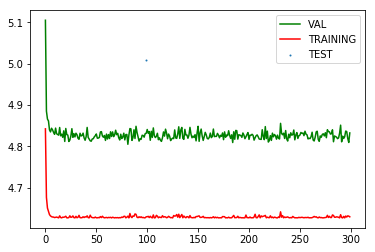

In [68]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

warm_start 는 이전의 값을 사용해서 학습하는 것<br>
-> ***만번 돌아갈때마다 데이터 저장해서 그 값을 사용해서 학습하는 것***<br><br>

constant는? constant로 해놓으면, learning_rate가 **안 줄어들고** 그대로<br>
여기서만 시작하는 eta0가 너무 작으니깐 그냥 constant해 놓은 거야. 

In [69]:
np.argsort(rmse_val_score)
#처음 나오는 숫자 번째 val_score가 제일 작나봐

array([ 81, 184, 298, 219, 291, 283,  23,  19, 114, 151, 269,  45,  92,
       238, 264, 148,  44, 123, 220, 155,  59, 222,  85, 103,  39, 113,
       205,  24, 263,  73,  78, 245, 111, 175, 215, 212, 268, 200,  94,
       136,  33, 186, 211, 227, 189,  43, 210, 124, 230,  61,  46, 258,
       160, 237,  93, 120,  47, 196, 287, 260, 126, 217,  63,  88, 235,
        75, 297, 159, 293, 248, 182, 132, 129, 135,  32, 229, 140, 259,
        51,  52, 125, 128, 288,  38, 171, 112, 144, 240, 115,  72, 276,
        86, 206, 163, 108, 146,  53, 105, 193,  42,  17,  27, 271, 265,
        57, 161, 177,  97, 286,  76,  91,  29,  48, 224, 197, 294, 209,
        40, 156,  67, 166, 285, 261,  65, 164, 168, 214, 173, 167, 109,
       292, 122, 117, 145,  56, 154,  25,  35, 284, 270, 274,  15, 107,
       207, 249, 226, 179,  49, 254, 221,  36, 192,  58,  96, 181, 204,
       202, 172,  95, 242,  13, 141, 228, 191, 250, 170,  82, 201, 195,
        22, 178, 246, 138, 139, 208, 158, 257,  68, 183, 233, 19

In [70]:
model_list[81].coef_

array([-0.93728015,  0.78228836,  0.2653348 ,  0.70743188, -2.23384537,
        3.4359609 , -0.08738885, -3.15028514,  1.88556313, -1.50556667,
       -2.04338477,  1.17147704, -3.31017339])

In [71]:
rmse(y_test, sgd_regressor.predict(X_test))

5.009459357197992

In [72]:
rmse(y_test ,model_list[81].predict(X_test))

5.008514898851588

## ETC

RepeatedKFold - 중복이 포함된 K-Fold<br>
**StratifiedFold - Y값 비율에 따라 뽑음**<br>
ex) 98% 암이고 2% 암 이면 이 비율에 따라서 추출<br>
GoupKFold - 그룹별로 데이터 Sampling 